In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import pdb
import sys

from sklearn import neighbors

# User Study to Evaluate the KnnDecisionBoundariesVisualizer in YellowBrick


### Balance Scale Data Set 

##### Data Set Information:

This data set was generated to model psychological experimental results. Each example is classified as having the balance scale tip to the right, tip to the left, or be balanced. The attributes are the left weight, the left distance, the right weight, and the right distance. The correct way to find the class is the greater of (left-distance * left-weight) and (right-distance * right-weight). If they are equal, it is balanced.

#### Attribute Information:

1. Class Name: 3 (L, B, R)
2. Left-Weight: 5 (1, 2, 3, 4, 5)
3. Left-Distance: 5 (1, 2, 3, 4, 5)
4. Right-Weight: 5 (1, 2, 3, 4, 5)
5. Right-Distance: 5 (1, 2, 3, 4, 5)

In [3]:
from sklearn import preprocessing

#load data from the 
data = pd.read_csv('balance-scale.csv')
frame = pd.DataFrame(data)
features = ['LEFT-WEIGHT','RIGHT-WEIGHT']
classes = ''
X = frame[features].as_matrix()
y = frame['CLASS-NAME'].as_matrix()
le = preprocessing.LabelEncoder()
#transform CLASS-NAME strings to integer
y = le.fit_transform(y)

In [4]:
from yellowbrick.style.palettes import PALETTES

# setting some constants
n_estimators=4
n_neighbors=4
#setting a different palette to override default color palette in boundaries package
colors=PALETTES['paired']
#colors

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
# function creates a plot using Matplotlib libs to compare with YB library

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def show_plot(model, X, y, n_neighbors=10, h=0.2):
    # Create color maps
    cmap_light = plt.get_cmap('Pastel1')
    cmap_bold = plt.get_cmap('Dark2')

    # we create an instance of Neighbours Classifier and fit the data.
    model.fit(X, y)
    model.predict(X)
    #model.n_neighbors = n_neighbors

    # Plot the decision boundary. For that, we will asign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.set_cmap(plt.cm.Paired)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

### Rendering plot for KNeighborsClassifier

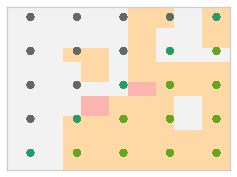

In [6]:
model = neighbors.KNeighborsClassifier(n_neighbors)
show_plot(model,X,y)

In [7]:
import yellowbrick as yb
from yellowbrick.boundaries import DecisionBoundariesVisualizer

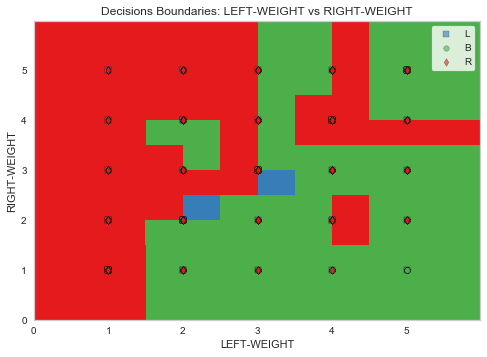

In [8]:
viz = DecisionBoundariesVisualizer(model, features=features,classes=['L','B','R'])
viz.fit_draw_poof(X, y)

### Rendering plot for RandomForestClassifier

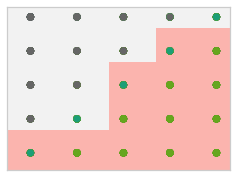

In [9]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators)
show_plot(model,X,y)

In [10]:
viz = DecisionBoundariesVisualizer(model, features=features,classes=['L','B','R'],colors=colors)
viz.fit_draw_poof(X, y)

NameError: name 'colors' is not defined

### Rendering plot for DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=1)
show_plot(model,X,y)

In [ ]:
viz = DecisionBoundariesVisualizer(model, features=features,classes=['L','B','R'],colors=colors)
viz.fit_draw_poof(X, y)